170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 70s 0us/step

Training with SGD optimizer


C:\Users\Zainab\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.1392 - loss: 2.2708 - val_accuracy: 0.2046 - val_loss: 2.1257
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.2275 - loss: 2.0499 - val_accuracy: 0.3385 - val_loss: 1.8708
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.2967 - loss: 1.8997 - val_accuracy: 0.3703 - val_loss: 1.7595
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.3473 - loss: 1.7734 - val_accuracy: 0.3938 - val_loss: 1.6949
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.3911 - loss: 1.6695 - val_accuracy: 0.4133 - val_loss: 1.6490
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.4198 - loss: 1.6017 - val_accuracy: 0.4555 - val_loss: 1.5173
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.4444 - loss: 1.5254 - val_accuracy: 0.4956 - val_loss: 1.4306
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.4617 - loss: 1.4896 - 

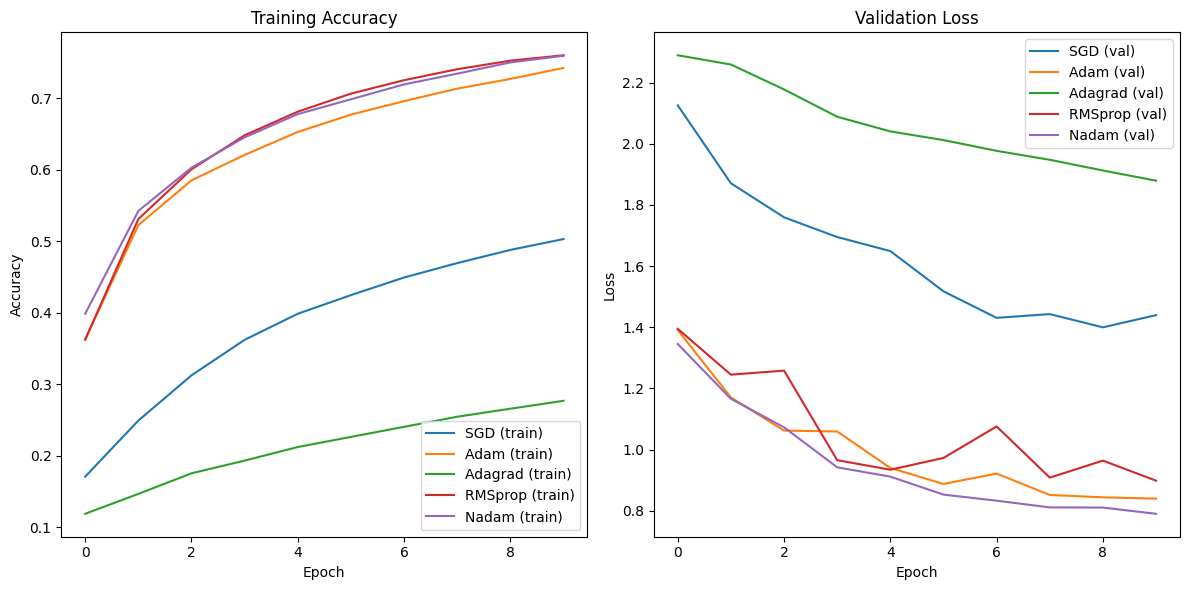


Optimizer: SGD
Test Loss: 1.4395
Test Accuracy: 0.5029
Training Time: 206.11 seconds

Optimizer: Adam
Test Loss: 0.8393
Test Accuracy: 0.7133
Training Time: 259.05 seconds

Optimizer: Adagrad
Test Loss: 1.8792
Test Accuracy: 0.3289
Training Time: 262.12 seconds

Optimizer: RMSprop
Test Loss: 0.8980
Test Accuracy: 0.7069
Training Time: 249.73 seconds

Optimizer: Nadam
Test Loss: 0.7897
Test Accuracy: 0.7307
Training Time: 284.26 seconds


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import time

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Function to build the CNN model
def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

# Function to train and evaluate model with different optimizers
def train_evaluate(optimizer, optimizer_name):
    print(f"\nTraining with {optimizer_name} optimizer")
    model = build_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    start_time = time.time()
    
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), verbose=1)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    
    return history, test_loss, test_accuracy, elapsed_time

# List of optimizers to test
optimizers = [
    ('SGD', tf.keras.optimizers.SGD()),
    ('Adam', tf.keras.optimizers.Adam()),
    ('Adagrad', tf.keras.optimizers.Adagrad()),
    ('RMSprop', tf.keras.optimizers.RMSprop()),
    ('Nadam', tf.keras.optimizers.Nadam())
]

# Initialize an empty dictionary to store results
results = {}

# Train and evaluate with each optimizer
for optimizer_name, optimizer in optimizers:
    history, test_loss, test_accuracy, elapsed_time = train_evaluate(optimizer, optimizer_name)
    results[optimizer_name] = {
        'history': history,
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'elapsed_time': elapsed_time
    }

# Plotting accuracy and loss
plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.subplot(1, 2, 1)
for optimizer_name in results:
    plt.plot(results[optimizer_name]['history'].history['accuracy'], label=f'{optimizer_name} (train)')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot validation loss
plt.subplot(1, 2, 2)
for optimizer_name in results:
    plt.plot(results[optimizer_name]['history'].history['val_loss'], label=f'{optimizer_name} (val)')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Print out the results for each optimizer
for optimizer_name, result in results.items():
    print(f"\nOptimizer: {optimizer_name}")
    print(f"Test Loss: {result['test_loss']:.4f}")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"Training Time: {result['elapsed_time']:.2f} seconds")
